In [1]:

#  CONFIGURE DEFAULTS
import os
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODELS_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'


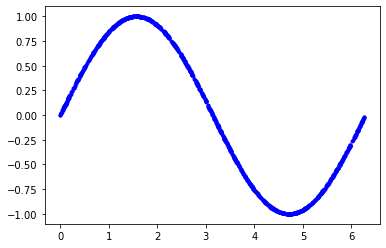

In [2]:

# SETUP ENVIRONMENT

# TensorFlow is an open source machine learning library
import tensorflow as tf
# Keras is TensorFlow's high-level API for deep learning
from tensorflow import keras
# Numpy is a math library
import numpy as np
# Pandas is a data manipulation library
import pandas as pd
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# Math is Python's math library
import math

# Set seed for experiment reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

#  1. GENERATE DATA
# Number of sample datapoints

SAMPLES = 1000

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(
    low=0, high=2*math.pi, size=SAMPLES).astype(np.float32)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values).astype(np.float32)

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()


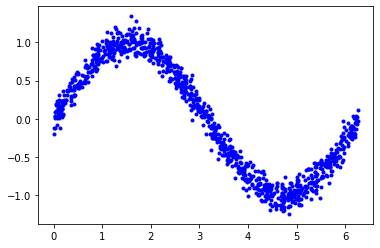

In [3]:
# to add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# plot our date
plt.plot(x_values, y_values,'b.')
plt.show()

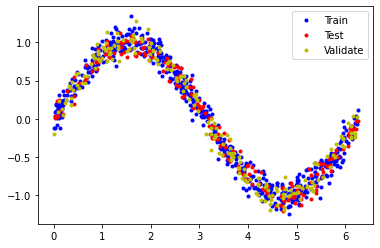

In [4]:
# SPLITTING DATA

# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()


# TRAINING
## 1. Design The Model
We're going to build a simple neural network model that will take an input value (in this case, x) and use it to predict a numeric output value (the sine of x). This type of problem is called a regression. It will use layers of neurons to attempt to learn any patterns underlying the training data, so it can make predictions.

To begin with, we'll define **two layers**. The first layer takes a single input (our **x value**) and runs it through 8 neurons. Based on this input, each neuron will become activated to a certain degree based on its internal state (its weight and bias values). A neuron's degree of activation is expressed as a number.

The activation numbers from our first layer will be fed as inputs to our second layer, which is a single neuron. It will apply its own weights and bias to these inputs and calculate its own activation, which will be output as our **y value**.
---
The code in the following cell defines our model using *Keras*, TensorFlow's high-level API for creating deep learning networks. Once the network is defined, we compile it, specifying parameters that determine how it will be trained:

In [6]:
# 1. Design The Model

# We'll use Keras to create a simple model architecture
model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 8 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
# "A Scalar is simply a variable that holds an individual value"
model_1.add(keras.layers.Dense(8, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since we want to output a single value
model_1.add(keras.layers.Dense(1))

# Compile the model using the standard 'adam' optimizer and the mean squared error or 'mse' loss function for regression.
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])


# 2. Train the Model

Once we've defined the model, we can use our data to train it. Training involves **passing an x value** into the neural network, checking how far the network's **output** deviates from the **expected y value**, and adjusting the neurons' weights and biases so that the output is more likely to be correct the next time.

Training runs this process on the full dataset multiple times, and each full run-through is known as an **epoch**. The number of epochs to run during training is a parameter we can set.

During each epoch, data is run through the network in multiple batches. Each batch, several pieces of data are passed into the network, producing output values. These outputs' correctness is measured in aggregate and the network's weights and biases are adjusted accordingly, once per batch. The batch size is also a parameter we can set.

The code in the following cell uses the x and y values from our training data to train the model. It runs for 500 epochs, with 64 pieces of data in each batch. We also pass in some data for validation. As you will see when you run the cell, training can take a while to complete:

In [7]:
# Train the model on our training data while validating on our validation set
history_1 = model_1.fit(x_train, y_train, epochs=500, batch_size=64,
                        validation_data=(x_validate, y_validate))


Epoch 1/500
10/10 [==============================] - 1s 62ms/step - loss: 0.7432 - mae: 0.7217 - val_loss: 0.6433 - val_mae: 0.6531
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6327 - mae: 0.6490 - val_loss: 0.5482 - val_mae: 0.5972
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 0.5067 - mae: 0.5656 - val_loss: 0.4799 - val_mae: 0.5655
Epoch 4/500
10/10 [==============================] - 0s 3ms/step - loss: 0.4813 - mae: 0.5627 - val_loss: 0.4353 - val_mae: 0.5489
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4205 - mae: 0.5311 - val_loss: 0.4087 - val_mae: 0.5407
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 0.3855 - mae: 0.5166 - val_loss: 0.3937 - val_mae: 0.5369
Epoch 7/500
10/10 [==============================] - 0s 4ms/step - loss: 0.3905 - mae: 0.5222 - val_loss: 0.3856 - val_mae: 0.5346
Epoch 8/500
10/10 [==============================] - 0s 4ms/step - loss: 0.3701 - 

# 3. Plot Metrics

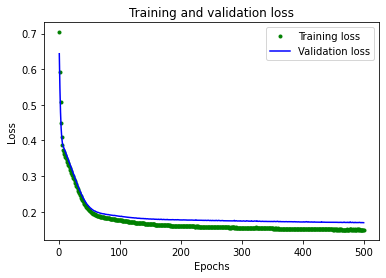

In [8]:
# 1. Loss. (or Mean Squared Error (MSE))
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


The graph shows the loss (or the difference between the model's predictions and the actual data) for each epoch. There are several ways to calculate loss, and the method we have used is mean squared error. There is a distinct loss value given for the training and the validation data.

As we can see, the amount of loss rapidly decreases over the first 25 epochs, before flattening out. This means that the model is improving and producing more accurate predictions!

Our goal is to stop training when either the model is no longer improving, or when the training loss is less than the validation loss, which would mean that the model has learned to predict the training data so well that it can no longer generalize to new data.

To make the flatter part of the graph more readable, let's skip the first 50 epochs:


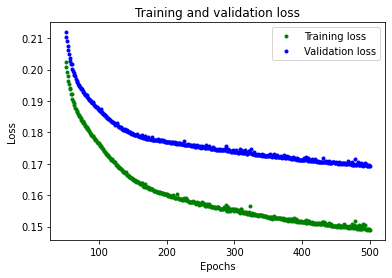

In [9]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 50

plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


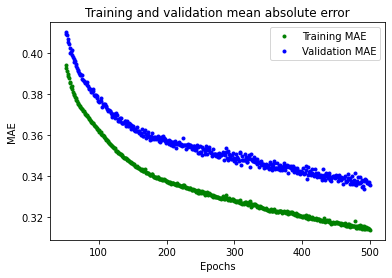

In [10]:
# Mean Absolute Error
plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
train_mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


7/7 [==============================] - 0s 676us/step - loss: 0.1461 - mae: 0.3118


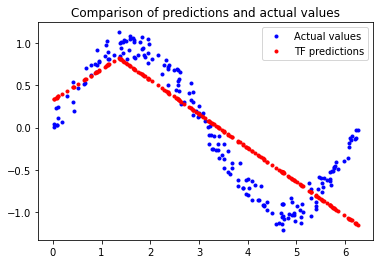

In [11]:
# Actual vs. Predicted Outputs

# Calculate and print the loss on our test dataset
test_loss, test_mae = model_1.evaluate(x_test, y_test)

# Make predictions based on our test dataset
y_test_pred = model_1.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predictions')
plt.legend()
plt.show()


# Training a Larger Model
1. Design the Model

To make our model bigger, let's add an additional layer of neurons. The following cell redefines our model in the same way as earlier, but with 16 neurons in the first layer and an additional layer of 16 neurons in the middle:

In [12]:
model = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model.add(keras.layers.Dense(16, activation='relu', input_shape=(1,)))

# The new second and third layer will help the network learn more complex representations
model.add(keras.layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model.add(keras.layers.Dense(1))

# Compile the model using the standard 'adam' optimizer and the mean squared error or 'mse' loss function for regression.
model.compile(optimizer='adam', loss="mse", metrics=["mae"])


In [13]:
# Train the model
history = model.fit(x_train, y_train, epochs=500, batch_size=64,
                    validation_data=(x_validate, y_validate))

# Save the model to disk
model.save(MODEL_TF)



Epoch 1/500
10/10 [==============================] - 0s 14ms/step - loss: 0.4695 - mae: 0.6059 - val_loss: 0.4303 - val_mae: 0.5698
Epoch 2/500
10/10 [==============================] - 0s 3ms/step - loss: 0.4101 - mae: 0.5492 - val_loss: 0.4008 - val_mae: 0.5459
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 0.3716 - mae: 0.5172 - val_loss: 0.3777 - val_mae: 0.5307
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 0.3726 - mae: 0.5200 - val_loss: 0.3572 - val_mae: 0.5189
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 0.3398 - mae: 0.4990 - val_loss: 0.3383 - val_mae: 0.5064
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 0.3130 - mae: 0.4786 - val_loss: 0.3206 - val_mae: 0.4948
Epoch 7/500
10/10 [==============================] - 0s 4ms/step - loss: 0.3119 - mae: 0.4773 - val_loss: 0.3035 - val_mae: 0.4829
Epoch 8/500
10/10 [==============================] - 0s 4ms/step - loss: 0.2845 - 

NameError: name 'MODEL_TF' is not defined